In [35]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from data_loading_finance.loading_data import LoadingData
from ts_tools.tools import tools
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX


[*********************100%%**********************]  1 of 1 completed

Getting info for ticker IBM...
    unique_id         ds           y
752       IBM 2021-01-04  100.474800
751       IBM 2021-01-05  102.258278
750       IBM 2021-01-06  104.811905
749       IBM 2021-01-07  104.568680
748       IBM 2021-01-08  104.195778
..        ...        ...         ...
4         IBM 2023-12-22  159.095825
3         IBM 2023-12-26  160.145737
2         IBM 2023-12-27  160.391052
1         IBM 2023-12-28  160.675598
0         IBM 2023-12-29  160.479355

[753 rows x 3 columns]


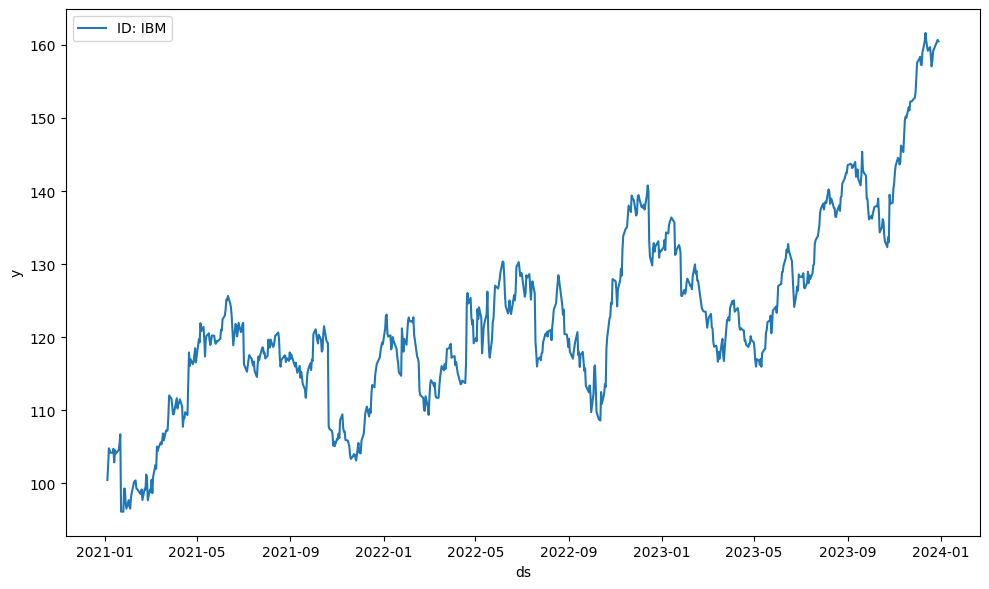

In [17]:
# Load the data
tickers = ['IBM']
loader = LoadingData(tickers=tickers)
ts = loader.get_data(start_date='2021-01-01', end_date='2024-01-01')
info = loader.get_info_ticker()

# Assuming ts_prepartion sorts the data, if not, add the sorting here
ts_tools = tools()
ts = ts_tools.ts_prepartion(ts, 'Date', 'Adj Close')

# Sort the data by Date in descending order
ts = ts.sort_index(ascending=False)
print(ts)

# Plot the time series
ts_tools.plot_ts(ts)

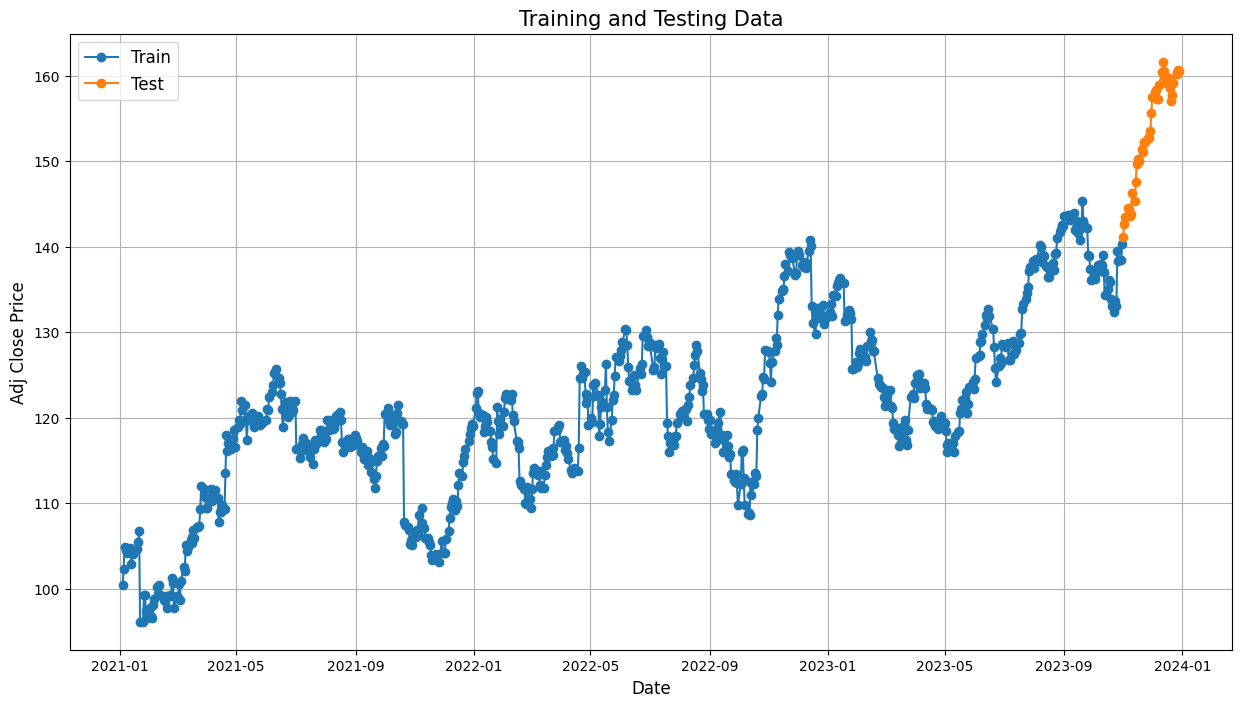

In [28]:
# Definir las fechas de inicio y fin para entrenamiento y prueba
train_start_dt = '2021-01-01'
train_end_dt = '2023-10-31'
test_start_dt = '2023-11-01'
test_end_dt = '2023-12-31'

# Asegurarse de que 'ds' sea un DatetimeIndex
ts['ds'] = pd.to_datetime(ts['ds'])
ts.set_index('ds', inplace=True)

# Separar los datos en conjuntos de entrenamiento y prueba
train_data = ts[(ts.index >= train_start_dt) & (ts.index <= train_end_dt)].rename(columns={'y': 'train'})
test_data = ts[(ts.index >= test_start_dt) & (ts.index <= test_end_dt)].rename(columns={'y': 'test'})

# Visualizar los conjuntos de entrenamiento y prueba
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data['train'], label='Train', marker='o')
plt.plot(test_data.index, test_data['test'], label='Test', marker='o')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close Price', fontsize=12)
plt.title('Training and Testing Data', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [29]:
train = ts.copy()[(ts.index >= train_start_dt) & (ts.index < test_start_dt)][['y']]
test = ts.copy()[ts.index >= test_start_dt][['y']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (712, 1)
Test data shape:  (41, 1)


In [32]:
scaler = MinMaxScaler()
train['y'] = scaler.fit_transform(train)
train.head(10)

,y
ds,
2021-01-04,0.088248
2021-01-05,0.124469
2021-01-06,0.176331
2021-01-07,0.171391
2021-01-08,0.163818
2021-01-11,0.164641
2021-01-12,0.175014
2021-01-13,0.137311
2021-01-14,0.171062


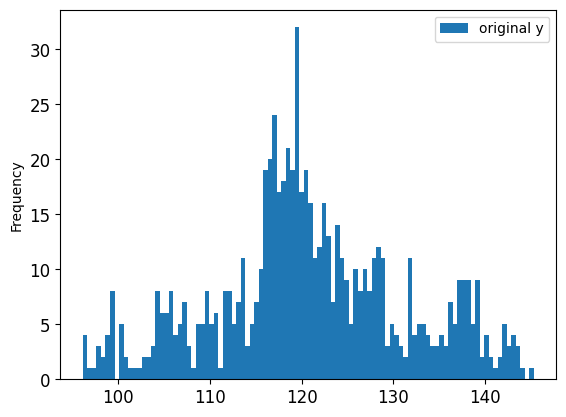

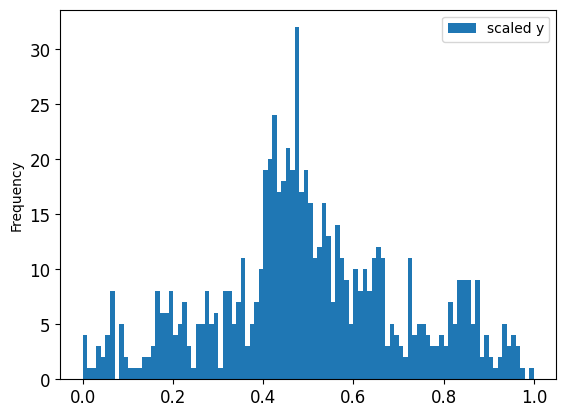

In [33]:
ts[(ts.index >= train_start_dt) & (ts.index < test_start_dt)][['y']].rename(columns={'y':'original y'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={'y':'scaled y'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test['y'] = scaler.transform(test)
test.head()

,y
ds,
2023-11-01,0.912709
2023-11-02,0.944433
2023-11-03,0.961970
2023-11-06,0.983054
2023-11-07,0.980295
